# PROYECTO-3: ANALÍTICA DE DATOS CON PYTHON


## Análisis del Rendimiento Académico de Estudiantes

### 0. Import libraries

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tabulate import tabulate

# Set display options
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [3]:
# Configuración para visualizaciones más agradables
plt.style.use('seaborn-v0_8')
sns.set(font_scale=1.2)
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['axes.grid'] = True

### 1. Load dataset


    #### GoogbleColab


In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/gdrive')

    #### search for the dataset

In [ ]:
# Se va a utilizar el conjunto de datos estudiantes
# https://www.kaggle.com/datasets/spscientist/students-performance-in-exams

df = pd.read_csv('/gdrive/MyDrive/Datasets/StudentsPerformance.csv')

    ##### Locale Datasets


In [44]:
# Load the dataset
df = pd.read_csv('datasets/StudentsPerformance.csv')

In [45]:
# Verificar los datos cargados
print("Forma del DataFrame:", df.shape)
print("\nPrimeras 5 filas:")
print(df.head())
print("\nInformación del DataFrame:")
df.info()
print("\nEstadísticas descriptivas:")
print(df.describe())

Forma del DataFrame: (1000, 8)

Primeras 5 filas:
   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data col

In [ ]:
# Verificar los nombres de las columnas
print(df.columns.tolist())

['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score', 'writing score', 'average_score']


In [31]:
# Añadir columna de promedio total para algunos análisis
df['average_score'] = (df['math score'] + df['reading score'] + df['writing score']) / 3


## 1. ¿Cuál es la distribución de calificaciones en matemáticas, lectura y escritura entre todos los estudiantes?  

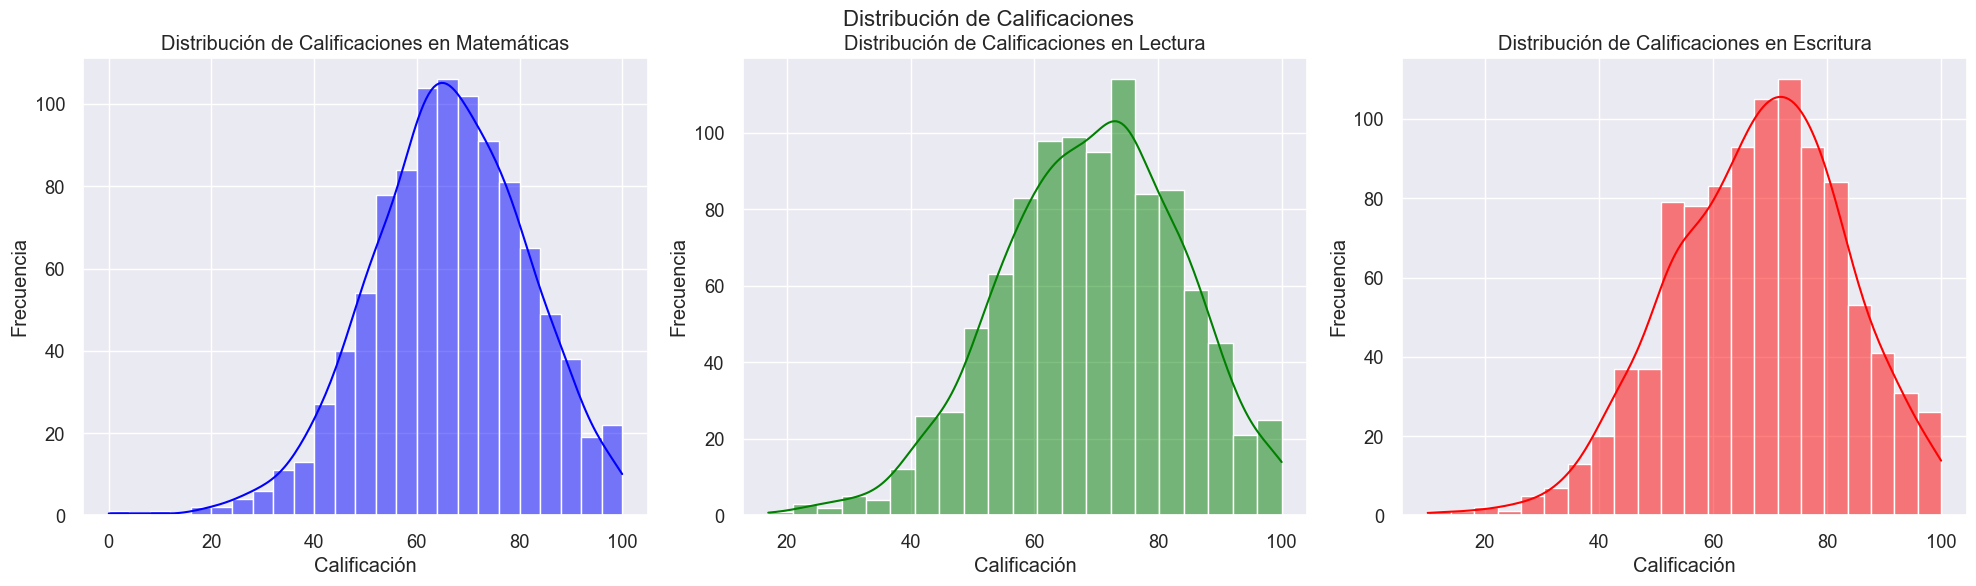


Estadísticas descriptivas de las calificaciones:
╒═══════╤══════════════╤═════════════════╤═════════════════╕
│       │   math score │   reading score │   writing score │
╞═══════╪══════════════╪═════════════════╪═════════════════╡
│ count │    1000      │       1000      │       1000      │
├───────┼──────────────┼─────────────────┼─────────────────┤
│ mean  │      66.089  │         69.169  │         68.054  │
├───────┼──────────────┼─────────────────┼─────────────────┤
│ std   │      15.1631 │         14.6002 │         15.1957 │
├───────┼──────────────┼─────────────────┼─────────────────┤
│ min   │       0      │         17      │         10      │
├───────┼──────────────┼─────────────────┼─────────────────┤
│ 25%   │      57      │         59      │         57.75   │
├───────┼──────────────┼─────────────────┼─────────────────┤
│ 50%   │      66      │         70      │         69      │
├───────┼──────────────┼─────────────────┼─────────────────┤
│ 75%   │      77      │         79

In [63]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Distribución de Calificaciones', fontsize=16)

# Histograma de matemáticas
sns.histplot(x=df['math score'], kde=True, color='blue', ax=axes[0])
axes[0].set_title('Distribución de Calificaciones en Matemáticas')
axes[0].set_xlabel('Calificación')
axes[0].set_ylabel('Frecuencia')

# Histograma de lectura
sns.histplot(x=df['reading score'], kde=True, color='green', ax=axes[1])
axes[1].set_title('Distribución de Calificaciones en Lectura')
axes[1].set_xlabel('Calificación')
axes[1].set_ylabel('Frecuencia')

# Histograma de escritura
sns.histplot(x=df['writing score'], kde=True, color='red', ax=axes[2])
axes[2].set_title('Distribución de Calificaciones en Escritura')
axes[2].set_xlabel('Calificación')
axes[2].set_ylabel('Frecuencia')

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.savefig('img/distribucion_calificaciones.png')
plt.show()

# Estadísticas descriptivas de cada materia
print("\nEstadísticas descriptivas de las calificaciones:")
stats = df[['math score', 'reading score', 'writing score']].describe()
print(tabulate(stats.values, headers=list(stats.columns), showindex=list(stats.index), tablefmt='fancy_grid'))

## 2. ¿Qué género obtiene en promedio mejores resultados en matemáticas, lectura y escritura?  


Promedio de calificaciones por género:
╒══════════╤══════════════╤═════════════════╤═════════════════╕
│ gender   │   math score │   reading score │   writing score │
╞══════════╪══════════════╪═════════════════╪═════════════════╡
│ female   │      63.6332 │         72.6081 │         72.4672 │
├──────────┼──────────────┼─────────────────┼─────────────────┤
│ male     │      68.7282 │         65.473  │         63.3112 │
╘══════════╧══════════════╧═════════════════╧═════════════════╛


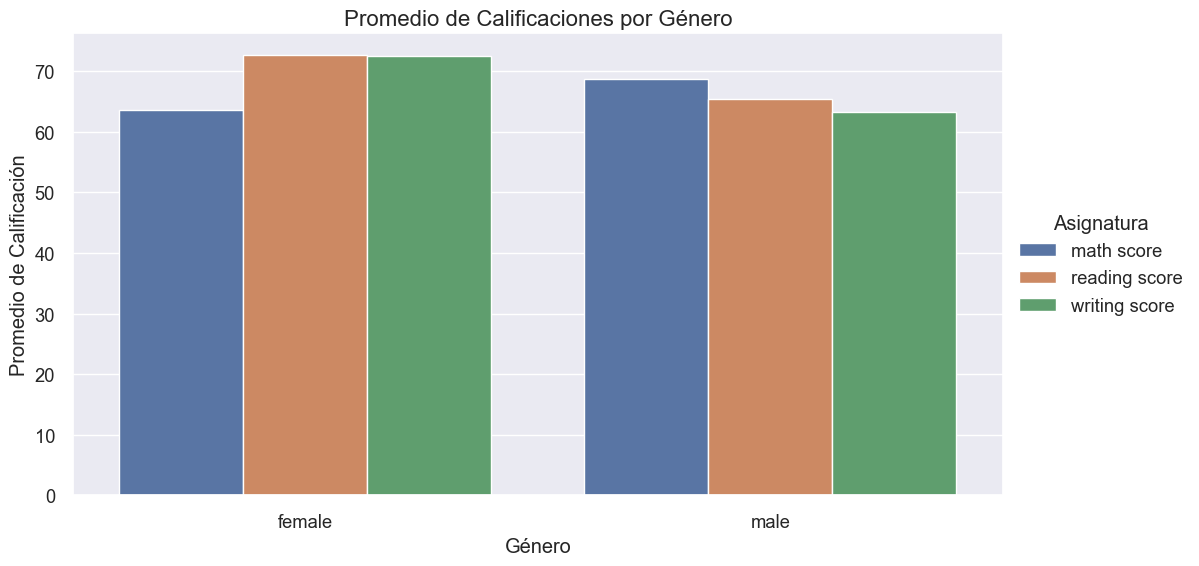

In [65]:
gender_scores = df.groupby('gender')[['math score', 'reading score', 'writing score']].mean().reset_index()
print("\nPromedio de calificaciones por género:")
print(tabulate(gender_scores.values, headers=list(gender_scores.columns), tablefmt='fancy_grid', showindex=False))

# Gráfico de barras para comparar resultados por género
plt.figure(figsize=(12, 6))
sns.barplot(x='gender', y='value', hue='variable', data=pd.melt(gender_scores, id_vars=['gender'], value_vars=['math score', 'reading score', 'writing score']))
plt.title('Promedio de Calificaciones por Género', fontsize=16)
plt.xlabel('Género')
plt.ylabel('Promedio de Calificación')
plt.legend(title='Asignatura', loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True, axis='y')
plt.savefig('img/calificaciones_por_genero.png')
plt.show()

## 3. ¿Influye el nivel educativo de los padres en las calificaciones de los estudiantes?  


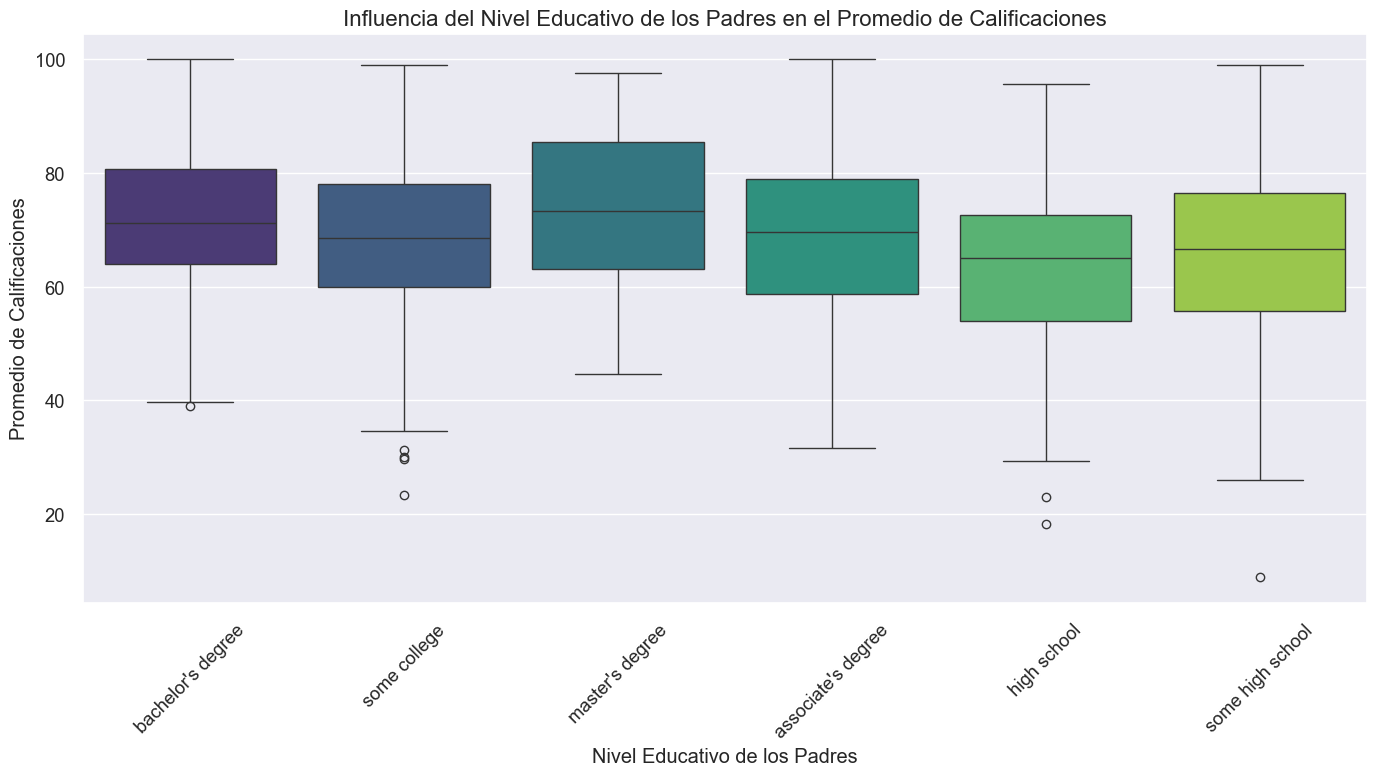


Estadísticas por nivel educativo de los padres:
╒═══════════════════════════════╤═════════╤══════════╤═════════╕
│ parental level of education   │    mean │   median │     std │
╞═══════════════════════════════╪═════════╪══════════╪═════════╡
│ master's degree               │ 73.5989 │  73.3333 │ 13.601  │
├───────────────────────────────┼─────────┼──────────┼─────────┤
│ bachelor's degree             │ 71.9237 │  71.1667 │ 13.9466 │
├───────────────────────────────┼─────────┼──────────┼─────────┤
│ associate's degree            │ 69.5691 │  69.6667 │ 13.6709 │
├───────────────────────────────┼─────────┼──────────┼─────────┤
│ some college                  │ 68.4764 │  68.6667 │ 13.711  │
├───────────────────────────────┼─────────┼──────────┼─────────┤
│ some high school              │ 65.108  │  66.6667 │ 14.9841 │
├───────────────────────────────┼─────────┼──────────┼─────────┤
│ high school                   │ 63.0969 │  65      │ 13.5106 │
╘═══════════════════════════════╧════════

In [74]:
# Asegurarse de que la columna 'average_score' existe
if 'average_score' not in df.columns:
    df['average_score'] = (df['math score'] + df['reading score'] + df['writing score']) / 3

plt.figure(figsize=(14, 8))
sns.boxplot(x='parental level of education', y='average_score', hue='parental level of education', 
            data=df, palette='viridis', legend=False)
plt.title('Influencia del Nivel Educativo de los Padres en el Promedio de Calificaciones', fontsize=16)
plt.xlabel('Nivel Educativo de los Padres')
plt.ylabel('Promedio de Calificaciones')
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()
plt.savefig('img/inivel_educativo_padres.png')
plt.show()

# Estadísticas por nivel educativo de los padres
education_scores = df.groupby('parental level of education')['average_score'].agg(['mean', 'median', 'std']).sort_values('mean', ascending=False)
print("\nEstadísticas por nivel educativo de los padres:")
print(tabulate(education_scores, headers='keys', tablefmt='fancy_grid', showindex=True))

## 4. ¿Los estudiantes que completaron el curso de preparación obtienen mejores resultados?  

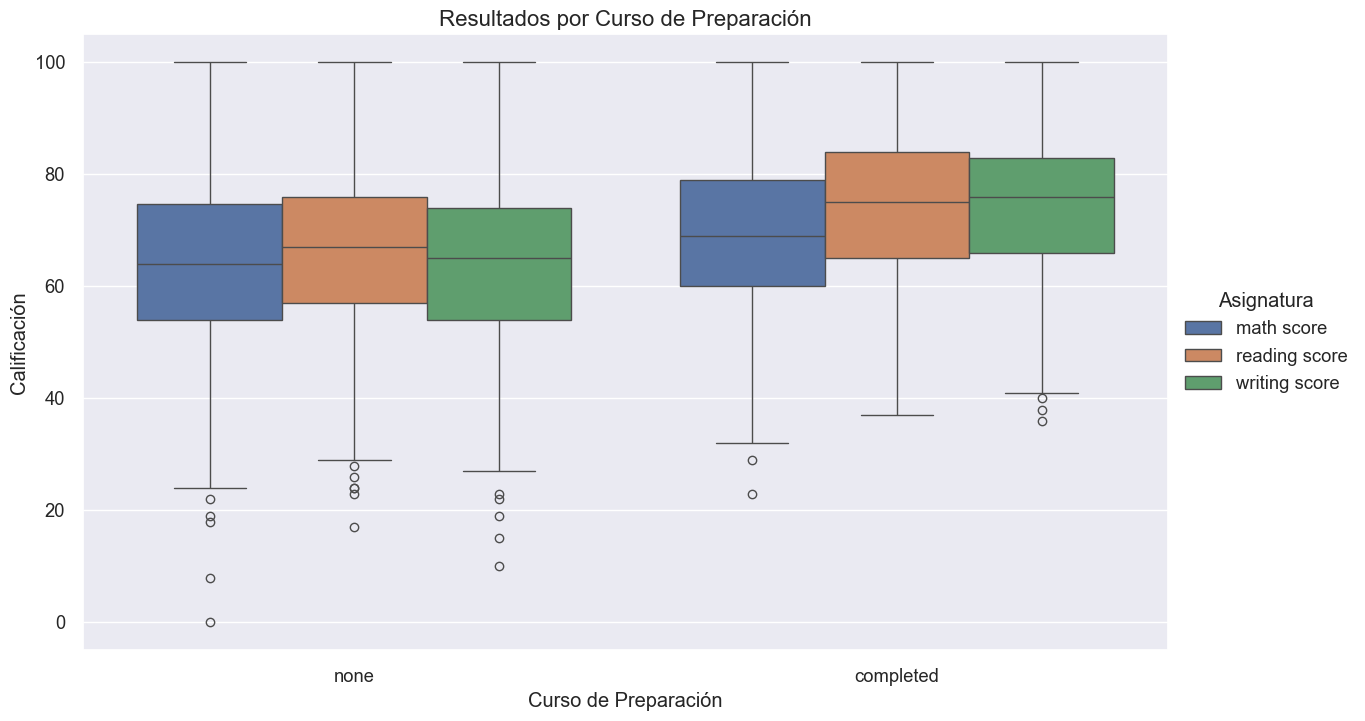


Promedio de calificaciones por curso de preparación:
╒═══════════════════════════╤══════════════╤═════════════════╤═════════════════╤═════════════════╕
│ test preparation course   │   math score │   reading score │   writing score │   average_score │
╞═══════════════════════════╪══════════════╪═════════════════╪═════════════════╪═════════════════╡
│ completed                 │      69.6955 │         73.8939 │         74.419  │         72.6695 │
├───────────────────────────┼──────────────┼─────────────────┼─────────────────┼─────────────────┤
│ none                      │      64.0779 │         66.5343 │         64.5047 │         65.0389 │
╘═══════════════════════════╧══════════════╧═════════════════╧═════════════════╧═════════════════╛


In [75]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='test preparation course', y='value', hue='variable', 
            data=pd.melt(df, id_vars=['test preparation course'], 
                          value_vars=['math score', 'reading score', 'writing score']))
plt.title('Resultados por Curso de Preparación', fontsize=16)
plt.xlabel('Curso de Preparación')
plt.ylabel('Calificación')
plt.legend(title='Asignatura', loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True, axis='y')
plt.savefig('img/resultados_curso_preparacion.png')
plt.show()

# Estadísticas por curso de preparación
prep_scores = df.groupby('test preparation course')[['math score', 'reading score', 'writing score', 'average_score']].mean()
print("\nPromedio de calificaciones por curso de preparación:")
print(tabulate(prep_scores, headers='keys', tablefmt='fancy_grid', showindex=True))

## 5. ¿Qué combinación de género y almuerzo escolar se asocia con promedios más altos o bajos?  


Promedio de calificaciones por género y tipo de almuerzo:
╒══════════╤══════════════╤═════════════════╕
│ gender   │ lunch        │   average_score │
╞══════════╪══════════════╪═════════════════╡
│ female   │ free/reduced │         63.2152 │
├──────────┼──────────────┼─────────────────┤
│ female   │ standard     │         73.2199 │
├──────────┼──────────────┼─────────────────┤
│ male     │ free/reduced │         61.0422 │
├──────────┼──────────────┼─────────────────┤
│ male     │ standard     │         68.3565 │
╘══════════╧══════════════╧═════════════════╛


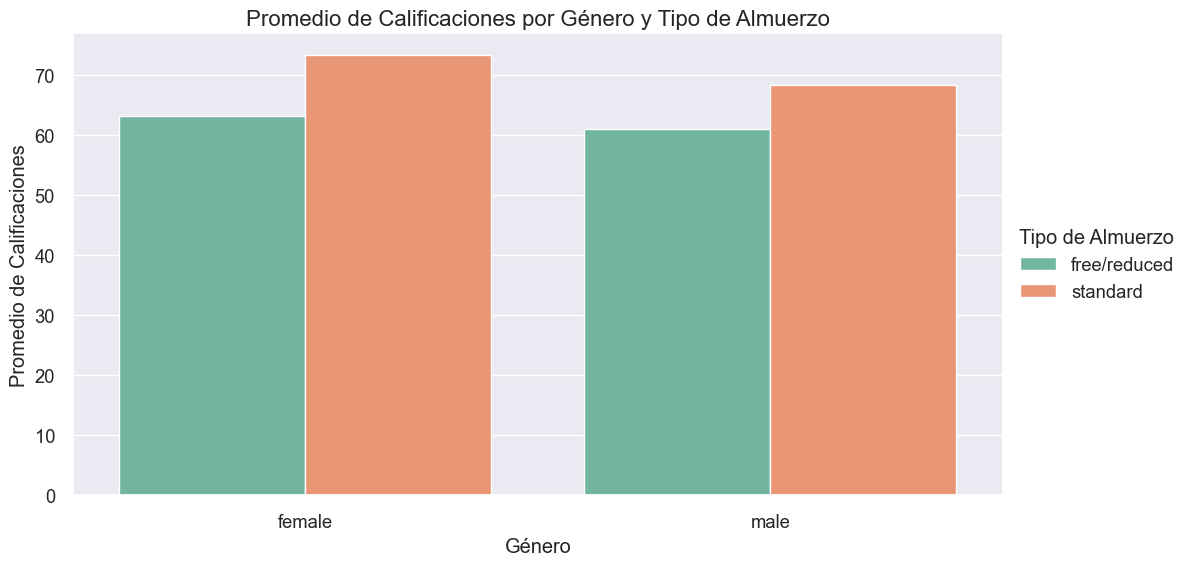

In [76]:
gender_lunch_scores = df.groupby(['gender', 'lunch'])['average_score'].mean().reset_index()
print("\nPromedio de calificaciones por género y tipo de almuerzo:")
print(tabulate(gender_lunch_scores, headers='keys', tablefmt='fancy_grid', showindex=False))

plt.figure(figsize=(12, 6))
sns.barplot(x='gender', y='average_score', hue='lunch', data=gender_lunch_scores, palette='Set2')
plt.title('Promedio de Calificaciones por Género y Tipo de Almuerzo', fontsize=16)
plt.xlabel('Género')
plt.ylabel('Promedio de Calificaciones')
plt.legend(title='Tipo de Almuerzo', loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True, axis='y')
plt.savefig('img/calificaciones_genero_almuerzo.png')
plt.show()

## 6. ¿Existen diferencias significativas en el rendimiento por grupo étnico?  

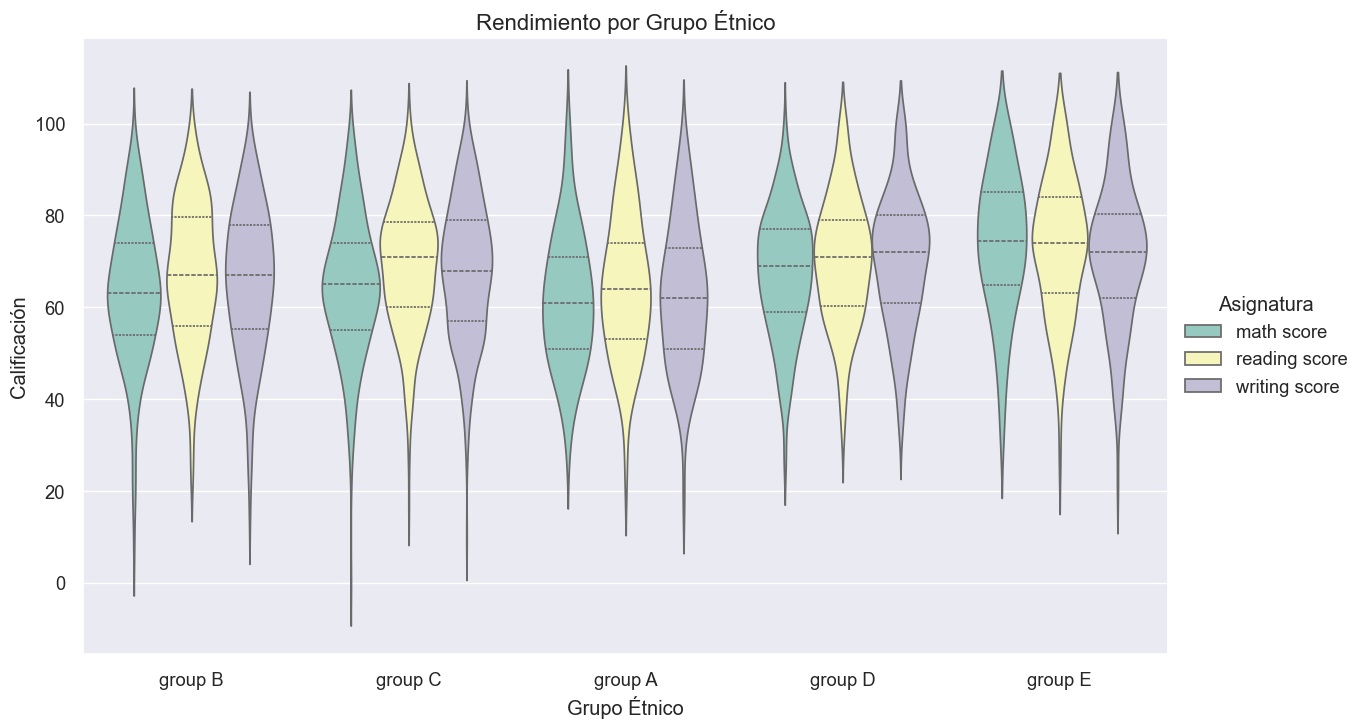


Promedio de calificaciones por grupo étnico:
╒══════════════════╤══════════════╤═════════════════╤═════════════════╤═════════════════╕
│ race/ethnicity   │   math score │   reading score │   writing score │   average_score │
╞══════════════════╪══════════════╪═════════════════╪═════════════════╪═════════════════╡
│ group E          │      73.8214 │         73.0286 │         71.4071 │         72.7524 │
├──────────────────┼──────────────┼─────────────────┼─────────────────┼─────────────────┤
│ group D          │      67.3626 │         70.0305 │         70.145  │         69.1794 │
├──────────────────┼──────────────┼─────────────────┼─────────────────┼─────────────────┤
│ group C          │      64.4639 │         69.1034 │         67.8276 │         67.1317 │
├──────────────────┼──────────────┼─────────────────┼─────────────────┼─────────────────┤
│ group B          │      63.4526 │         67.3526 │         65.6    │         65.4684 │
├──────────────────┼──────────────┼─────────────────┼─

In [77]:
plt.figure(figsize=(14, 8))
sns.violinplot(x='race/ethnicity', y='value', hue='variable',
              data=pd.melt(df, id_vars=['race/ethnicity'], 
                            value_vars=['math score', 'reading score', 'writing score']),
              inner='quartile', palette='Set3')
plt.title('Rendimiento por Grupo Étnico', fontsize=16)
plt.xlabel('Grupo Étnico')
plt.ylabel('Calificación')
plt.legend(title='Asignatura', loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True, axis='y')
plt.savefig('img/rendimiento_grupo_etnico.png')
plt.show()

# Estadísticas por grupo étnico
ethnicity_scores = df.groupby('race/ethnicity')[['math score', 'reading score', 'writing score', 'average_score']].mean()
ethnicity_scores = ethnicity_scores.sort_values('average_score', ascending=False)
print("\nPromedio de calificaciones por grupo étnico:")
print(tabulate(ethnicity_scores, headers='keys', tablefmt='fancy_grid', showindex=True))

## 7. ¿Cuál es la correlación entre las tres calificaciones?  


Matriz de correlación entre calificaciones:
╒═══════════════╤══════════════╤═════════════════╤═════════════════╕
│               │   math score │   reading score │   writing score │
╞═══════════════╪══════════════╪═════════════════╪═════════════════╡
│ math score    │     1        │        0.81758  │        0.802642 │
├───────────────┼──────────────┼─────────────────┼─────────────────┤
│ reading score │     0.81758  │        1        │        0.954598 │
├───────────────┼──────────────┼─────────────────┼─────────────────┤
│ writing score │     0.802642 │        0.954598 │        1        │
╘═══════════════╧══════════════╧═════════════════╧═════════════════╛


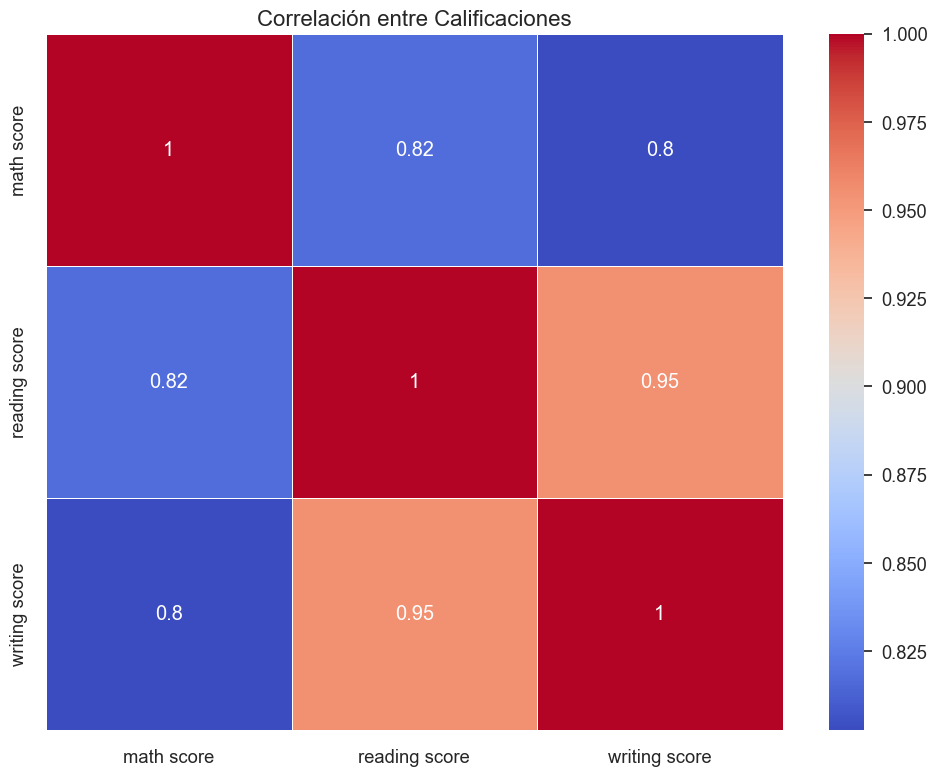

In [78]:
correlation_matrix = df[['math score', 'reading score', 'writing score']].corr()
print("\nMatriz de correlación entre calificaciones:")
print(tabulate(correlation_matrix, headers='keys', tablefmt='fancy_grid', showindex=True))

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlación entre Calificaciones', fontsize=16)
plt.tight_layout()
plt.savefig('img/correlacion_calificaciones.png')
plt.show()

## 8. ¿Cuál es la calificación promedio por tipo de almuerzo (estándar vs. reducido)?  


Promedio de calificaciones por tipo de almuerzo:
╒══════════════╤══════════════╤═════════════════╤═════════════════╤═════════════════╕
│ lunch        │   math score │   reading score │   writing score │   average_score │
╞══════════════╪══════════════╪═════════════════╪═════════════════╪═════════════════╡
│ free/reduced │      58.9211 │         64.6535 │         63.0225 │         62.1991 │
├──────────────┼──────────────┼─────────────────┼─────────────────┼─────────────────┤
│ standard     │      70.0341 │         71.6543 │         70.8233 │         70.8372 │
╘══════════════╧══════════════╧═════════════════╧═════════════════╧═════════════════╛


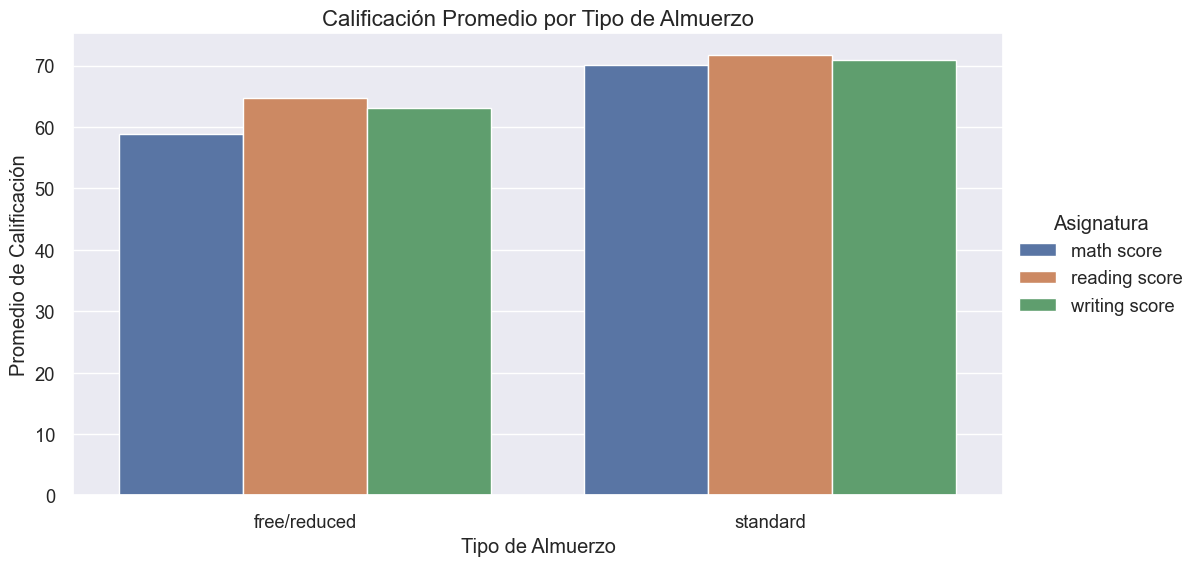

In [79]:
lunch_scores = df.groupby('lunch')[['math score', 'reading score', 'writing score', 'average_score']].mean()
print("\nPromedio de calificaciones por tipo de almuerzo:")
print(tabulate(lunch_scores, headers='keys', tablefmt='fancy_grid', showindex=True))

plt.figure(figsize=(12, 6))
sns.barplot(
    x='lunch', y='value', hue='variable',
    data=pd.melt(
        df.groupby('lunch')[['math score', 'reading score', 'writing score']].mean().reset_index(),
        id_vars=['lunch'], value_vars=['math score', 'reading score', 'writing score']
    )
)
plt.title('Calificación Promedio por Tipo de Almuerzo', fontsize=16)
plt.xlabel('Tipo de Almuerzo')
plt.ylabel('Promedio de Calificación')
plt.legend(title='Asignatura', loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True, axis='y')
plt.savefig('img/calificaciones_tipo_almuerzo.png')
plt.show()

## 9. ¿Qué porcentaje de estudiantes obtuvo más de 90 puntos en las tres asignaturas?  


Porcentaje de estudiantes con más de 90 puntos en las tres asignaturas: 2.30%


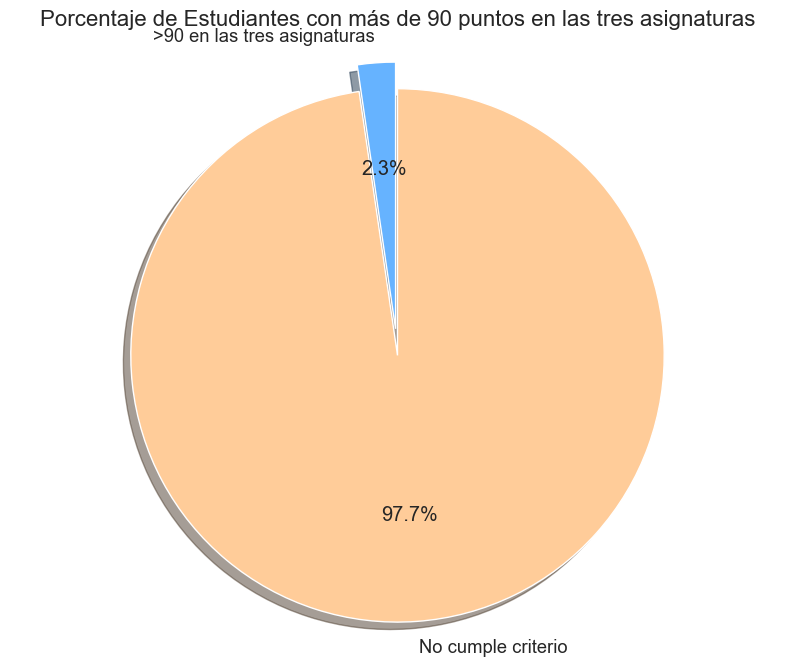

In [60]:
high_achievers = df[(df['math score'] > 90) & (df['reading score'] > 90) & (df['writing score'] > 90)]
percentage = (len(high_achievers) / len(df)) * 100
print(f"\nPorcentaje de estudiantes con más de 90 puntos en las tres asignaturas: {percentage:.2f}%")

# Crear un gráfico de pastel para visualizar esta proporción
plt.figure(figsize=(10, 8))
labels = ['>90 en las tres asignaturas', 'No cumple criterio']
sizes = [percentage, 100 - percentage]
colors = ['#66b3ff', '#ffcc99']
explode = (0.1, 0)  # explode 1st slice
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, shadow=True)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Porcentaje de Estudiantes con más de 90 puntos en las tres asignaturas', fontsize=16)
plt.savefig('img/estudiantes_alto_rendimiento.png')
plt.show()

## 10. ¿Cuál es la distribución conjunta de notas entre matemáticas y escritura (o lectura)?  

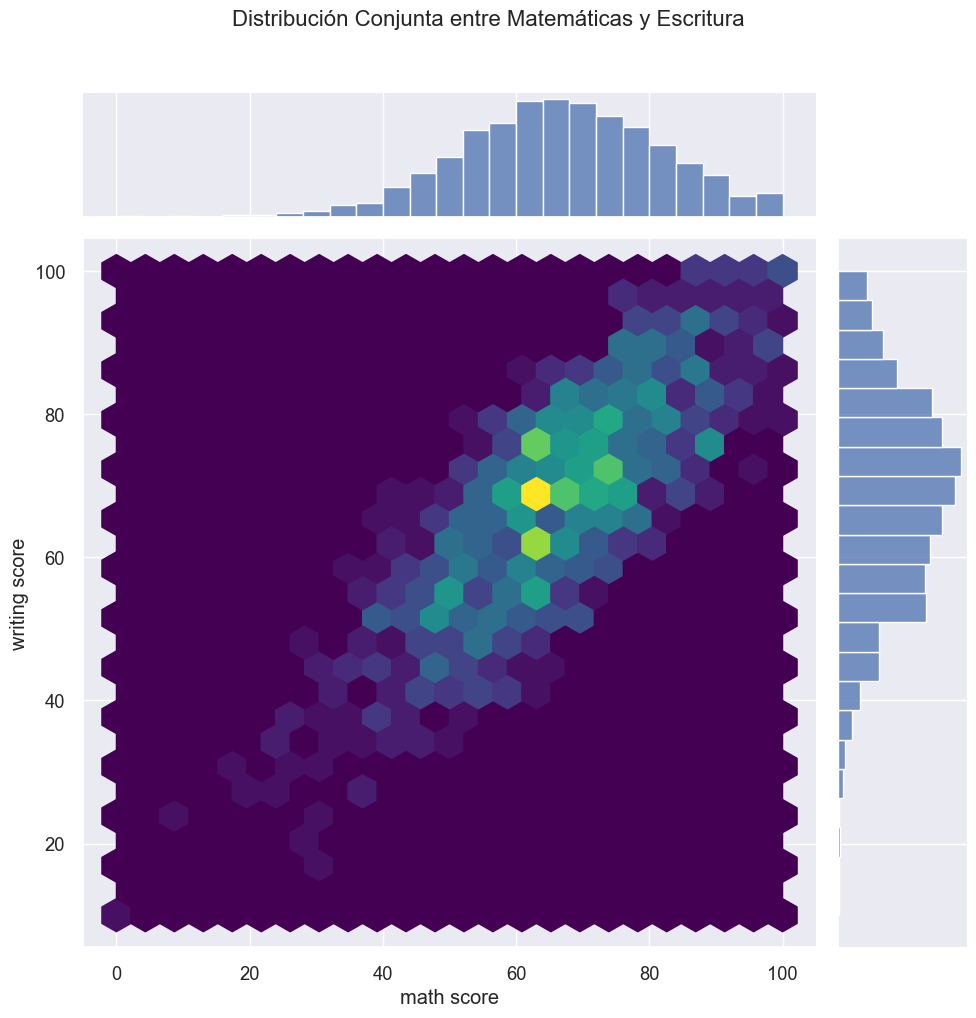

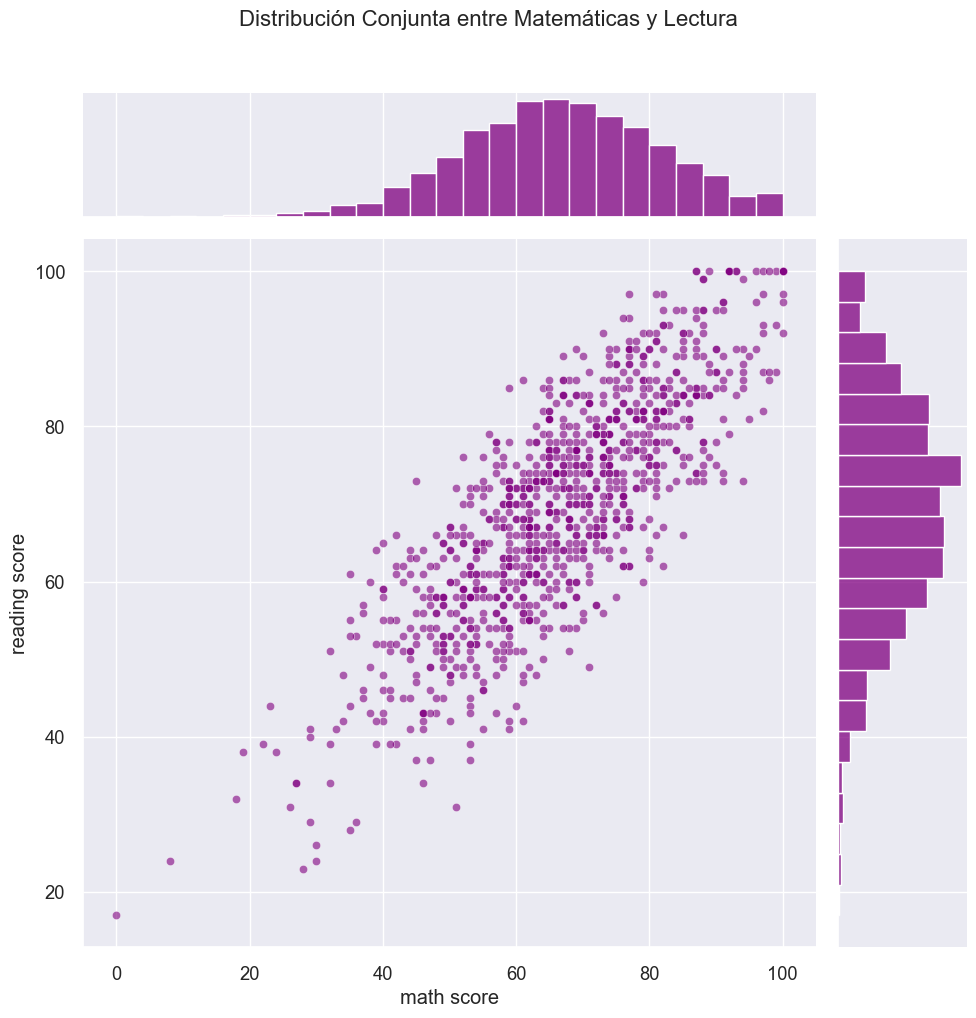


=== HALLAZGOS CLAVE ===
1. La calificación promedio global es: 67.77
2. Género con mejor promedio: female
3. Nivel educativo de padres con mejor promedio: master's degree
4. Diferencia en promedio entre estudiantes con curso de preparación y sin él: 7.63
5. Correlación más alta entre asignaturas: writing score y reading score (r=0.95)


In [ ]:
g = sns.jointplot(x='math score', y='writing score', data=df, kind='hex', height=10, cmap='viridis')
g.fig.suptitle('Distribución Conjunta entre Matemáticas y Escritura', y=1.02, fontsize=16)
plt.tight_layout()
plt.savefig('img/distribucion_conjunta_matematicas_escritura.png')
plt.show()

# Análisis adicional: Distribución conjunta entre matemáticas y lectura
g = sns.jointplot(x='math score', y='reading score', data=df, kind='scatter', height=10, color='purple', alpha=0.6)
g.fig.suptitle('Distribución Conjunta entre Matemáticas y Lectura', y=1.02, fontsize=16)
plt.tight_layout()
plt.savefig('img/distribucion_conjunta_matematicas_lectura.png')
plt.show()

# Resumen de hallazgos clave
# Añadir columna de promedio a gender_scores si no existe
if 'average_score' not in gender_scores.columns:
    gender_scores['average_score'] = gender_scores[['math score', 'reading score', 'writing score']].mean(axis=1)

# Ordenar correlación sin usar índices numéricos
correlations = correlation_matrix.unstack()
correlations = correlations[correlations.index.get_level_values(0) != correlations.index.get_level_values(1)]
correlations_sorted = correlations.sort_values(ascending=False)
highest_corr = correlations_sorted.iloc[0]
highest_corr_vars = correlations_sorted.index[0]  # tuple of variable names

print("\n=== HALLAZGOS CLAVE ===")
print(f"1. La calificación promedio global es: {df['average_score'].mean():.2f}")
print(f"2. Género con mejor promedio: {gender_scores.iloc[gender_scores['average_score'].argmax()]['gender']}")
print(f"3. Nivel educativo de padres con mejor promedio: {education_scores.index[0]}")
print(f"4. Diferencia en promedio entre estudiantes con curso de preparación y sin él: {prep_scores.loc['completed']['average_score'] - prep_scores.loc['none']['average_score']:.2f}")
print(f"5. Correlación más alta entre asignaturas: {highest_corr_vars[0]} y {highest_corr_vars[1]} (r={highest_corr:.2f})")